# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


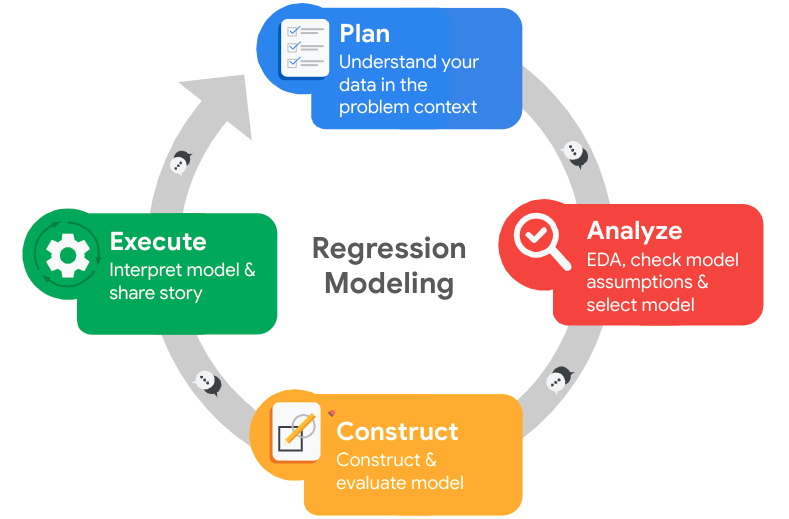

## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**

In [2]:
# Load dataset into a dataframe
df = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df = df.rename(columns={'Work_accident': 'work_accident',
                        'Department': 'department',
						'average_montly_hours': 'average_monthly_hours',
						'time_spend_company': 'tenure'})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df.duplicated().sum()

3008

3,008 rows contain duplicates.

In [9]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_cleaned = df.drop_duplicates()

# Display first few rows of new dataframe as needed
df_cleaned.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check outliers

Check for outliers in the data.

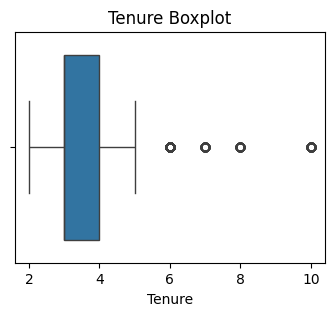

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(4, 3))
sns.boxplot(x=df_cleaned['tenure'])
plt.title('Tenure Boxplot')
plt.xlabel('Tenure')
plt.show()


The boxplot shows that there are outliers in `tenure`.

In [12]:
# Determine the number of rows containing outliers

# Compute the 25th and 75th percentile values in `tenure` 
percentile25 = df_cleaned['tenure'].quantile(0.25)
percentile75 = df_cleaned['tenure'].quantile(0.75)

# compute interquartile range
iqr = percentile75 - percentile25

# compute upper and lower bounds
lower_bound = percentile25 - 1.5 * iqr
upper_bound = percentile75 + 1.5 * iqr

# identify outliers
df_cleaned[(df_cleaned['tenure'] < lower_bound) | (df_cleaned['tenure'] > upper_bound)].shape

(824, 10)

There are 824 rows in the data containing outliers in `tenure`. 

Certain types of models are more sensitive to outliers than others. 
Considering whether to remove outliers will be based on the type of model.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print('Number of people who left:')
print(df_cleaned['left'].value_counts())

print('\nPercentage of people who left:')
# Get percentages of people who left vs. stayed
print(df_cleaned['left'].value_counts(normalize=True) * 100)


Number of people who left:
left
0    10000
1     1991
Name: count, dtype: int64

Percentage of people who left:
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


The data is imbalanced, with 83.4% of employees staying and 16.6% of employees leaving.

### Data visualizations

In [14]:
nums = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']
bnry = ['work_accident', 'promotion_last_5years']
cats = ['department', 'salary']
TARGET = ['left']

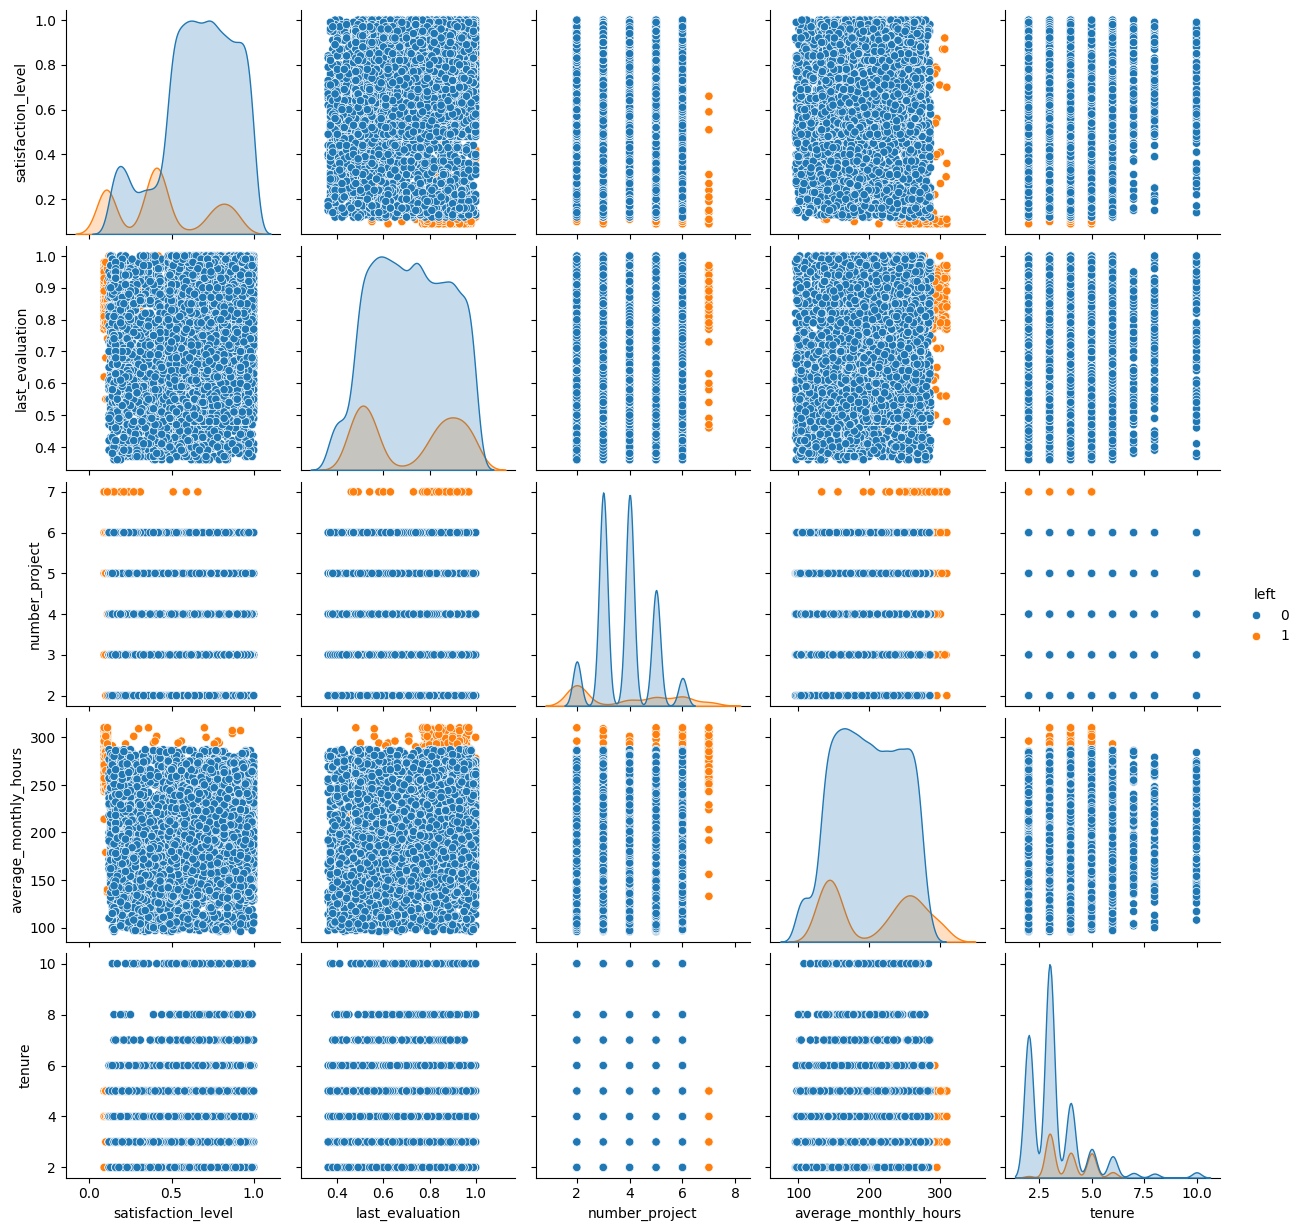

In [15]:
sns.pairplot(data=df_cleaned[nums + TARGET], hue='left')
plt.show()

Insights :

- Most of the `left` distribution in each numerical variables that are shown in histogram are overlapping. Except at the low `satisfaction level` and high `average_monthly_hours` where the employees who left the company are more than the employees who stayed.
- There are some clear boundaries in scatter plot which means that using tree-based models might be a good choice.
- No linear relationship between any of the numerical variables which means that using linear models might not be a good choice.

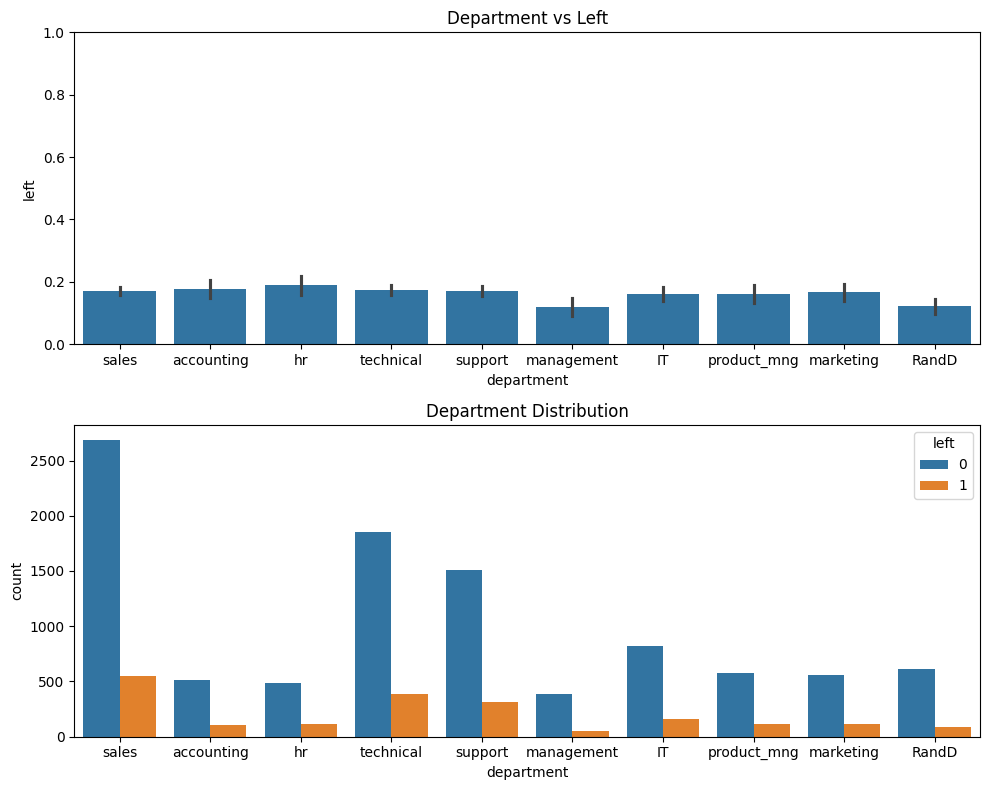

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# barplot satisfaction level vs. left
sns.barplot(x=df_cleaned['department'], y=df_cleaned['left'], ax=ax[0])
ax[0].set_ylim(0, 1)
ax[0].set_title('Department vs Left')

# countplot department distribution
sns.countplot(x=df_cleaned['department'], hue=df_cleaned['left'], ax=ax[1])
ax[1].set_title('Department Distribution')

plt.tight_layout()
plt.show()

Insights :

- `departement` doesn't seem to have a significant impact on `left` that can be seen on the barplot that shows the percentage of employees who left the company in each department doesn't differ much.
- `sales` and `technical` department have the highest number of employees who left the company, but it's not significant enough to conclude that these two departments are the main reason why employees left the company considering they also hace the highest number of employees.

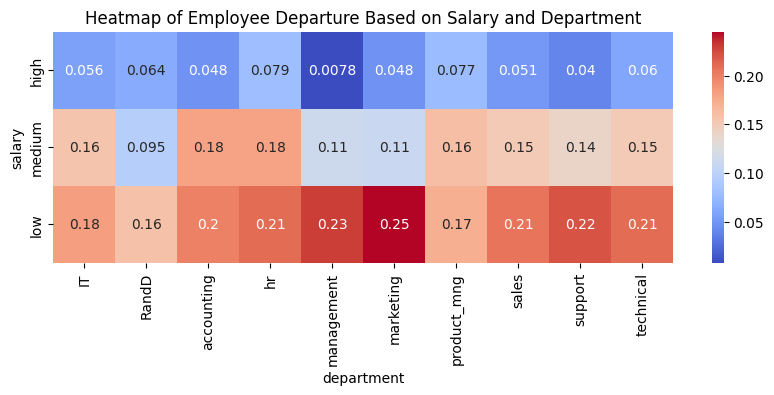

In [17]:
temp = df_cleaned.groupby(['department', 'salary'])['left'].mean()
temp = pd.DataFrame(temp).reset_index()
temp = temp.pivot_table(index='salary', columns='department', values='left')
temp = temp.reindex(['high', 'medium', 'low'])
plt.figure(figsize=(10,3))
sns.heatmap(temp, cmap='coolwarm', annot=True)
plt.title('Heatmap of Employee Departure Based on Salary and Department')
plt.show()

Insights :

- Employees with low `salary` are more likely to leave the company on all `department`.
- Employees with high `salary` are less likely to leave the company on all `department`.
- Employees in `marketing` department with low `salary` are more likely to leave the company compared to employees in other departments with low `salary`.

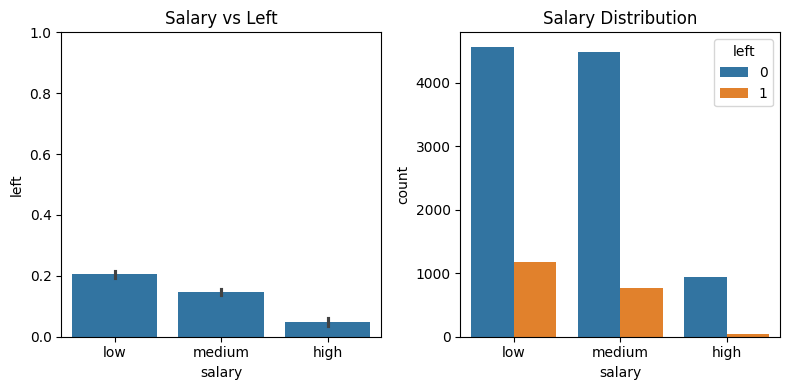

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.barplot(x=df_cleaned['salary'], y=df_cleaned['left'], order=['low', 'medium', 'high'], ax=ax[0])
ax[0].set_ylim(0, 1)
ax[0].set_title('Salary vs Left')

sns.countplot(x=df_cleaned['salary'], hue=df_cleaned['left'], order=['low', 'medium', 'high'], ax=ax[1])
ax[1].set_title('Salary Distribution')

plt.tight_layout()
plt.show()

Insights :

- Employees with low `salary` are more likely to leave the company than medium and high `salary`.

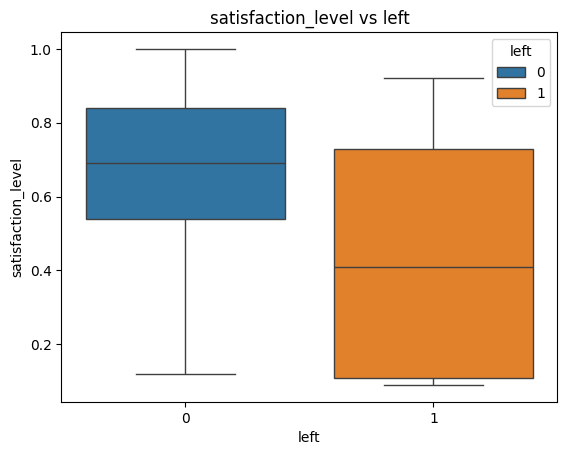

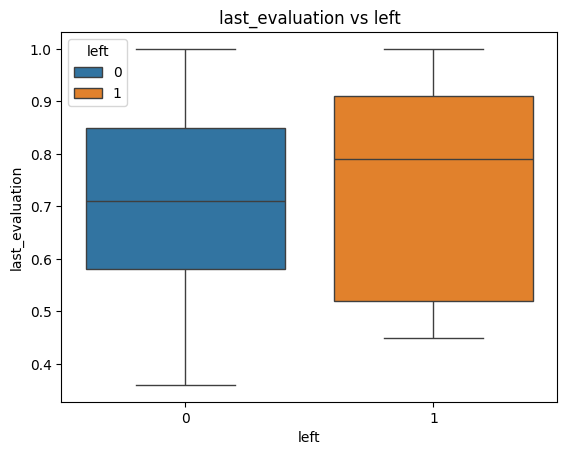

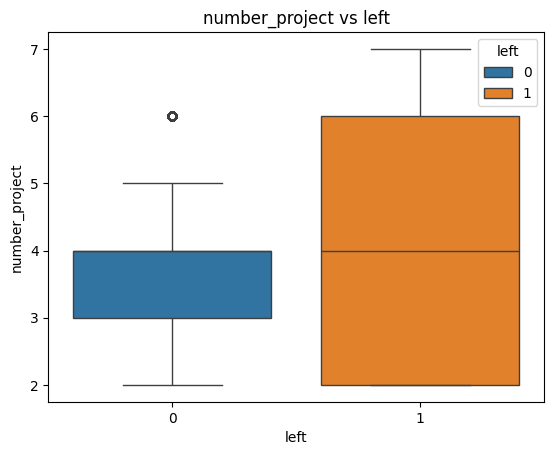

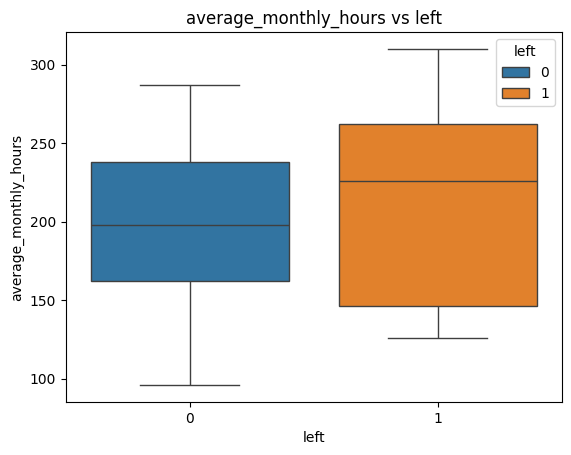

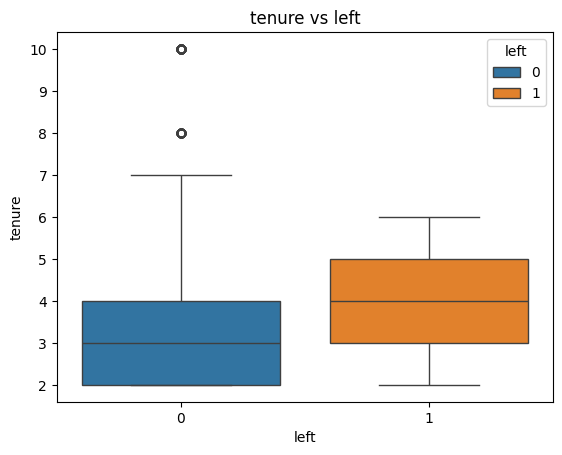

In [19]:
for col in nums:
    sns.boxplot(y=df_cleaned[col], x=df_cleaned['left'], hue=df_cleaned['left'])
    plt.title(str(col) + " vs left")
    plt.show()

Insights :

- Employees thath rate low `satisfaction_level` are more likely to leave the company.
- `last_evaluation` doesn't seem to have a significant impact on `left`.
- `number_project` of the employees who left have broader range than the employees who stayed.
- Distribution of `average_monthly_hours` based by `left` is similar to `number_project` where the employees who left have broader range than the employees who stayed.
- High `tenure` employees are more likely to leave the company. This needs to be investigated further.

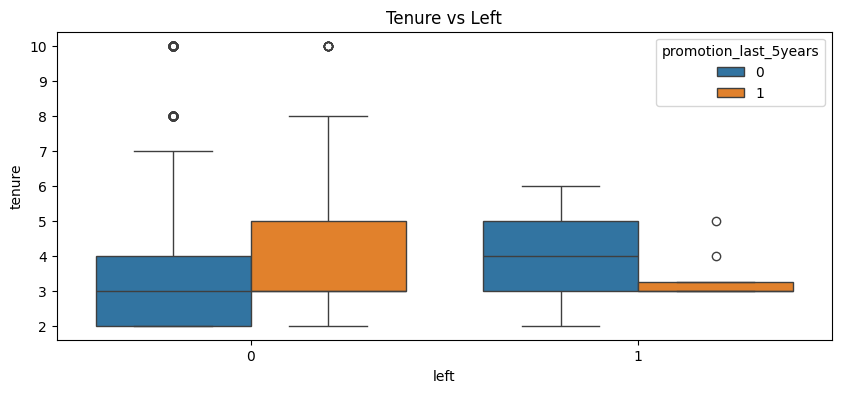

In [20]:
plt.figure(figsize=(10, 4))
sns.boxplot(y=df_cleaned['tenure'], x=df_cleaned['left'], hue=df_cleaned['promotion_last_5years'])
plt.title('Tenure vs Left')
plt.show()

Insights :

- High `tenure` and no `promotion_last_5years` employees are more likely to leave the company.

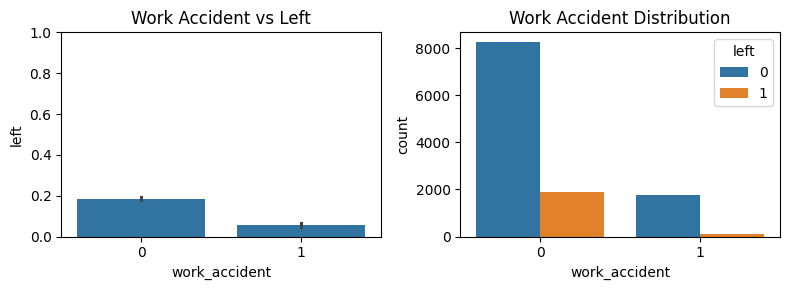

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

sns.barplot(x=df_cleaned['work_accident'], y=df_cleaned['left'], ax=ax[0])
ax[0].set_ylim(0, 1)
ax[0].set_title('Work Accident vs Left')

sns.countplot(x=df_cleaned['work_accident'], hue=df_cleaned['left'], ax=ax[1])
ax[1].set_title('Work Accident Distribution')

plt.tight_layout()
plt.show()

Insights :

- Employees that experienced `work_accident` are less likely to leave the company, this seems counterintuitive.

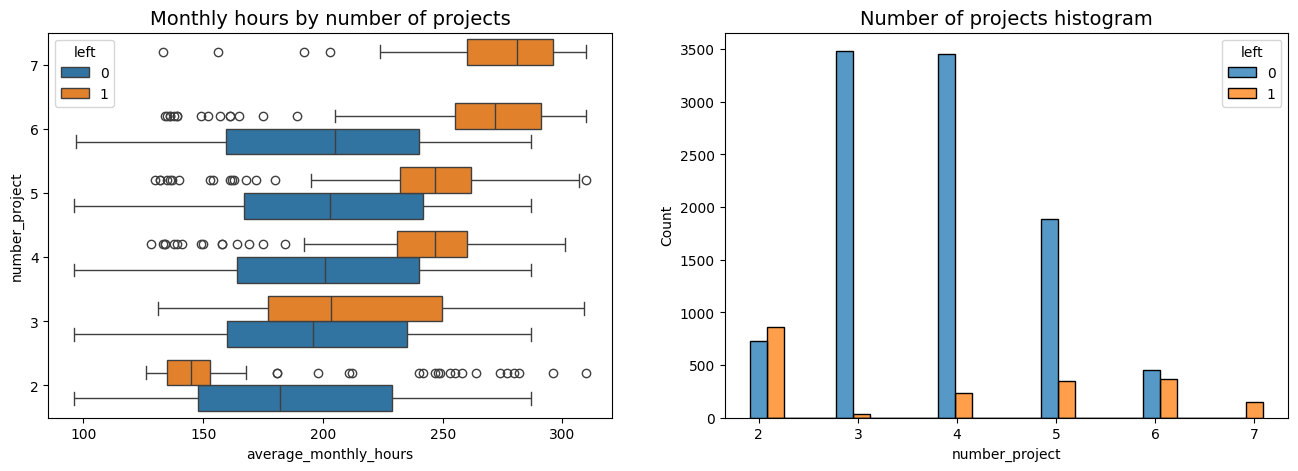

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (16,5))

sns.boxplot(data=df_cleaned, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

tenure_stay = df_cleaned[df_cleaned['left']==0]['number_project']
tenure_left = df_cleaned[df_cleaned['left']==1]['number_project']
sns.histplot(data=df_cleaned, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

Insights :

- All employees with 7 `number_project` left the company.
- The optimal `number_project` for employees to stay seems to be 3. Both boxplot of `number_project` between employee who stayed and left are overlapping.
- With the assumption work week of 40 hours and two weeks of vacation per year,  the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

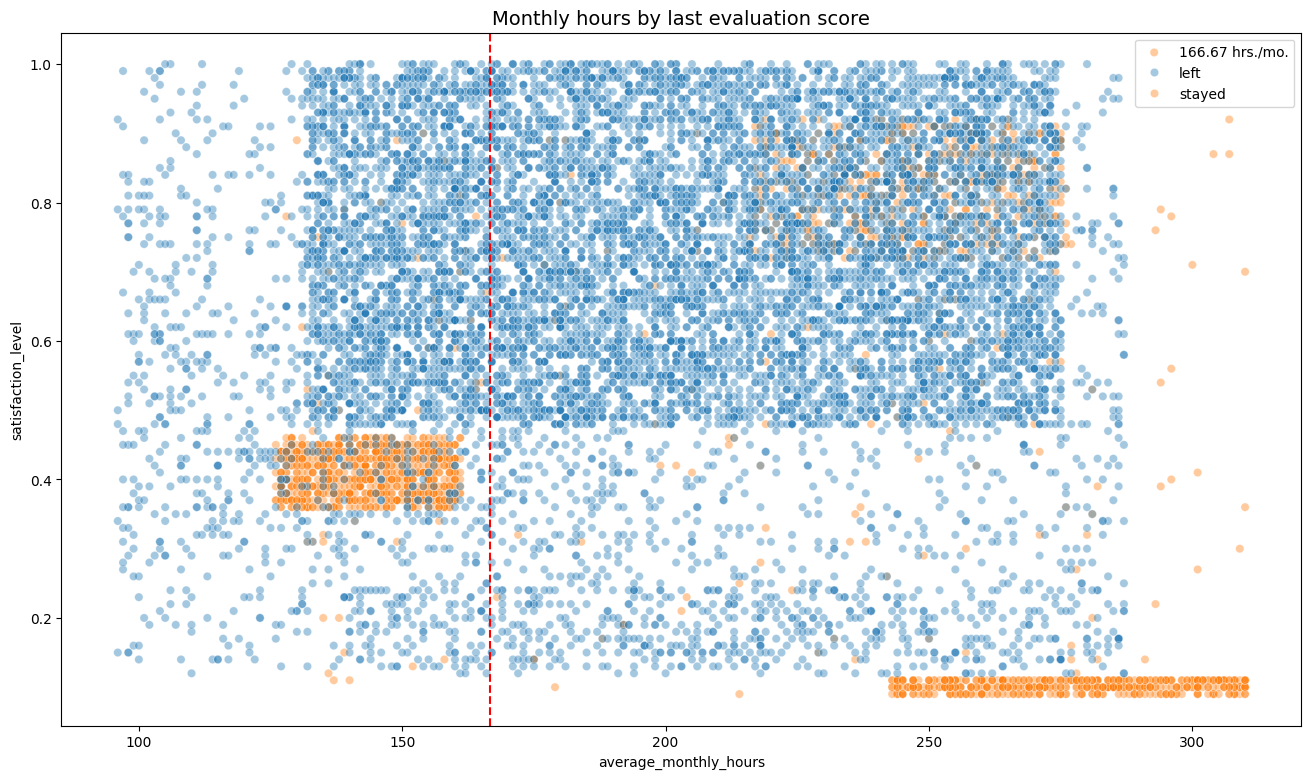

In [23]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_cleaned, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='red', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

Insights :

- There are group of employee who have normal working hours (~150 hours) and left the company and gave ~0.4 `satisfaction_level`.
- There are group of employee who have really high working hours (~250+ hours) and left the company and gave ~0.1 `satisfaction_level`.
- There are group of employee who have high working hours (~200 hours) and left the company and gave ~0.8 `satisfaction_level`.

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

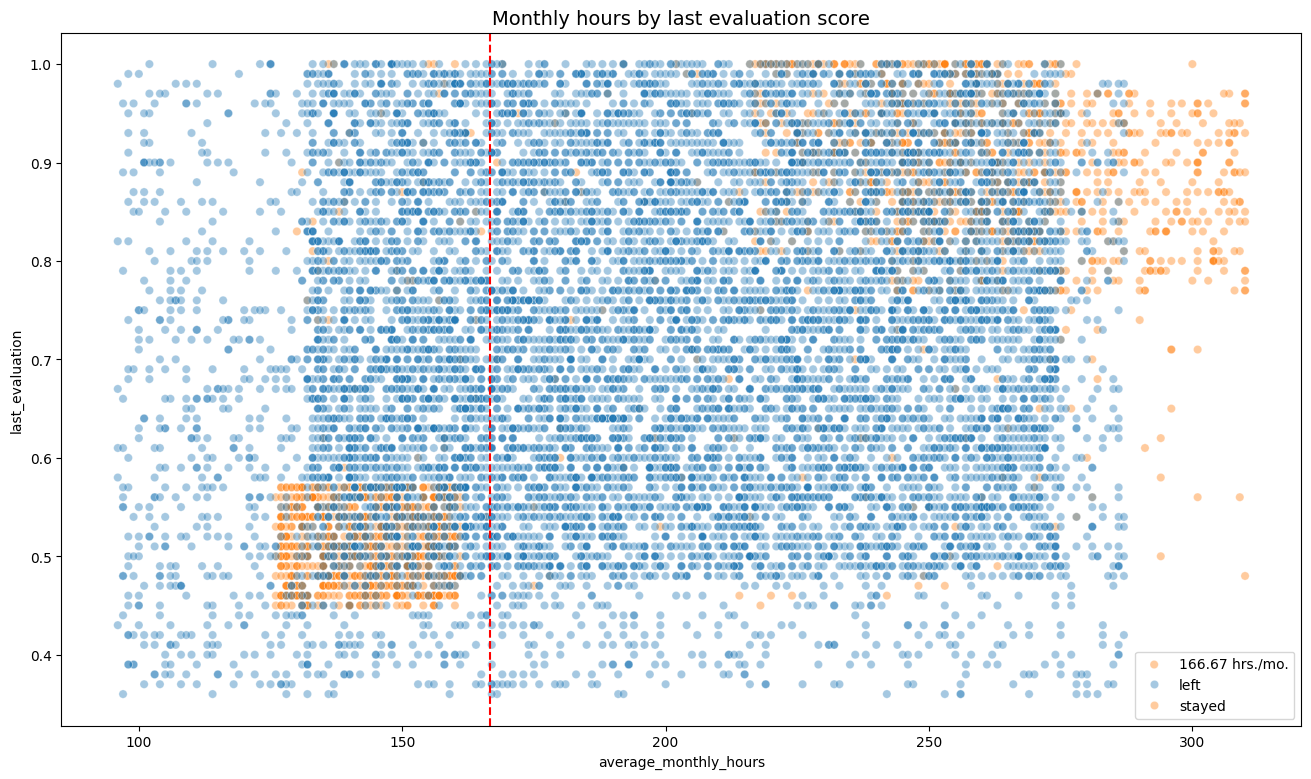

In [24]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_cleaned, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='red', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

Insights :

- There are group of employee with low `last_evaluation` with normal working hours (~150 hours) and left the company.
- There are group of employee with high `last_evaluation` with high working hours (~250+ hours) and left the company. This could mean that the company is overworking their employees.

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

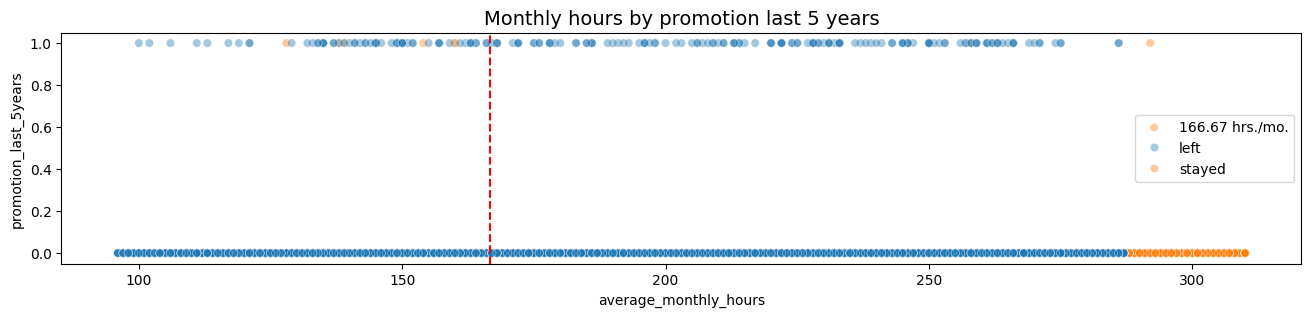

In [25]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df_cleaned, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='red', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')

Insights :

- Few employees who were promoted in the last 5 years left the company.
- Few employees who worked the most hours were promoted.
- Most employees who left the company were working the most hours and were not promoted.

Text(0.5, 1.0, 'Correlation Heatmap')

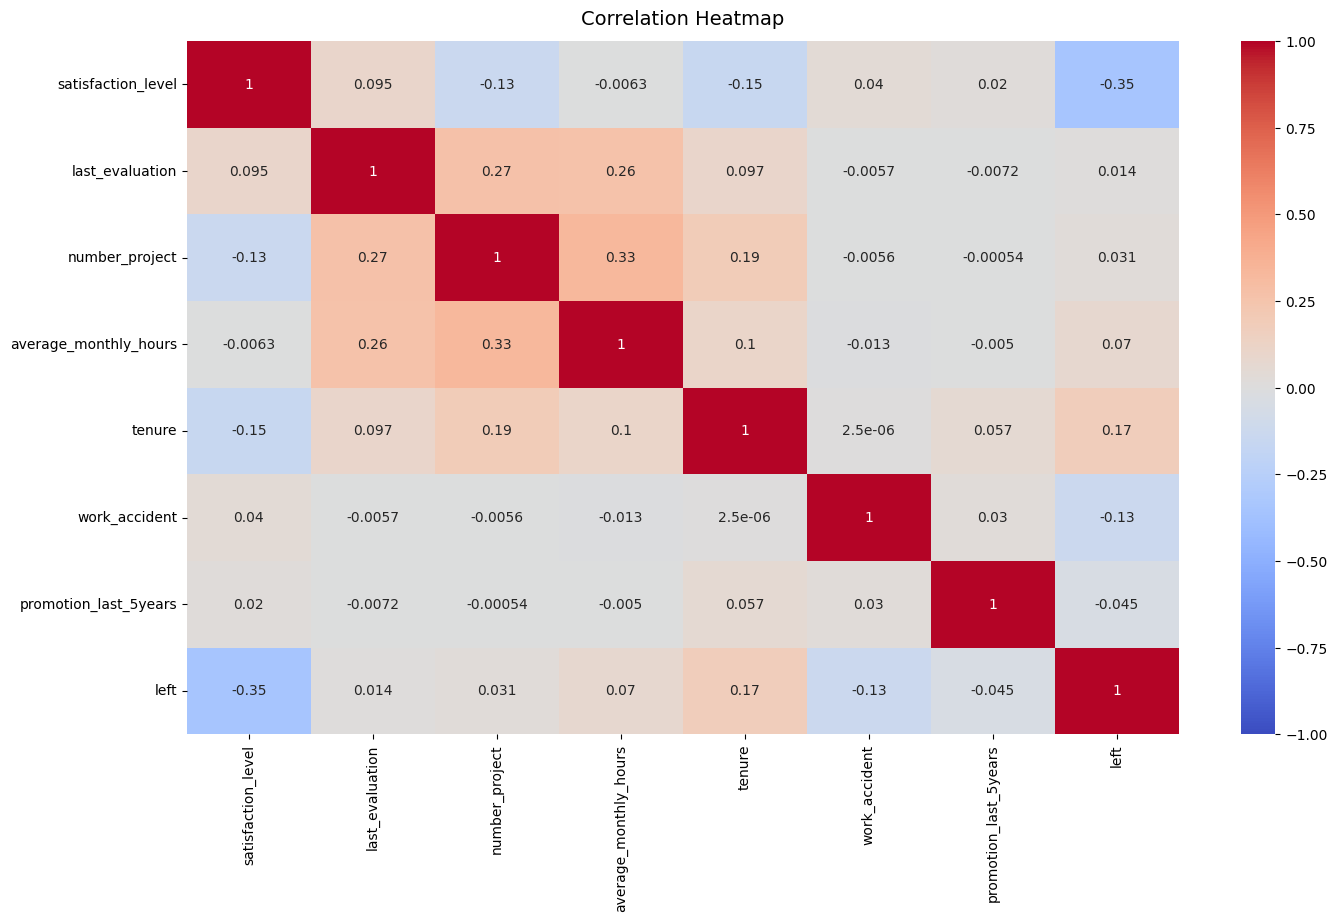

In [26]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_cleaned[nums + bnry + TARGET].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

Insights :

- The correlation confirms that `number_project` and `average_monthly_hours` are positively correlated.
- `left` is negatively correlated with `satisfaction_level`.

Insights summary:
Employees are leaving because poor management of the company. It is tied to longer working hours, many project, and low satisfaction level. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee leaves the company or not. This is a classification task. `0` means the employee stays and `1` means the employee leaves.

### Identify the types of models most appropriate for this task.

Because the task is categorical, the following models are appropriate:
- Logistic Regression model
- Tree-based models (Decision Tree, Random Forest, XGBoost)

### Modeling

Before proceeding with modeling, categorical data need to be encoded:
- `salary` will be encoded using ordinal encoding ``[low, medium, high] = [0, 1, 2]``
- `department` will be encoded using one-hot encoding.

In [27]:
df_encoded = df_cleaned.copy()
df_encoded['salary'] = df_encoded['salary'].map({'high': 2,
                                                 'medium': 1,
                                                 'low': 0})
df_encoded = pd.get_dummies(df_encoded, columns=['department'])
df_encoded.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

## Logistic Regression

Logistic regression is not robust to outliers, so the outliers in `tenure` will be removed.

In [28]:
df_logreg = df_encoded.copy()
df_logreg = df_logreg[(df_logreg['tenure'] >= lower_bound) & (df_logreg['tenure'] <= upper_bound)]
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

In [29]:
X = df_logreg.drop(['left'], axis=1)
y = df_logreg['left']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.25)

In [31]:
logreg_clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = logreg_clf.predict(X_test)

c:\Users\rhafaelc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


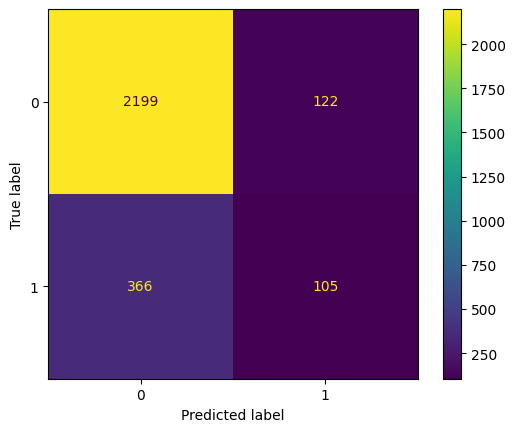

In [32]:
log_cm = confusion_matrix(y_test, y_pred, labels=logreg_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=logreg_clf.classes_)

log_disp.plot()
plt.show()

In [33]:
target_names = ['Predicted not leaving', 'Predicted leaving']
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

Predicted not leaving       0.86      0.95      0.90      2321
    Predicted leaving       0.46      0.22      0.30       471

             accuracy                           0.83      2792
            macro avg       0.66      0.59      0.60      2792
         weighted avg       0.79      0.83      0.80      2792



In [34]:
roc_auc_score(y_true=y_test, y_score=logreg_clf.predict_proba(X_test)[:, 1])

0.8927149967389048

The logistic regression classifier achieved:
- accuracy: 83%
- precision: 79% (weighted)
- recall: 83% (weighted)
- f1-score: 80% (weighted)
- auc score: 89%

In [35]:
result = pd.DataFrame({'model': ['Logistic Regression'],
					   'accuracy': [accuracy_score(y_test, y_pred)],
					   'precision': [precision_score(y_test, y_pred)],
					   'recall': [recall_score(y_test, y_pred)],
					   'f1': [f1_score(y_test, y_pred)],
					   'roc_auc': [roc_auc_score(y_true=y_test, y_score=logreg_clf.predict_proba(X_test)[:, 1])]})
result

model  accuracy  precision   recall       f1   roc_auc
0  Logistic Regression  0.825215   0.462555  0.22293  0.30086  0.892715

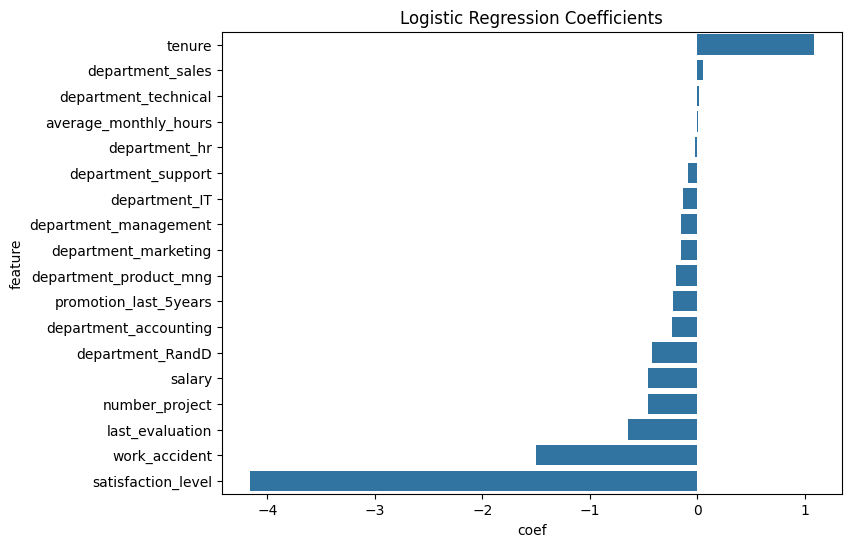

In [36]:
# make coefs dataframe and plot
coefs = pd.DataFrame({'feature': X_train.columns,
					  'coef': logreg_clf.coef_[0]})
coefs = coefs.sort_values(by='coef', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=coefs, x='coef', y='feature')
plt.title('Logistic Regression Coefficients')

plt.show()

Based on the coefficients, the most important features are `satisfaction_level`, `work_accident`, and `tenure`, `number_project`, `average_monthly_hours`, and `last_evaluation`.

## Tree-Based model

Tree-based models are robust to outliers, so the outliers in `tenure` will not be removed.

Models that will be used:
- Random Forest Classifier
- XGBoost Classifier

In [37]:
df_tree = df_encoded.copy()
df_tree.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [38]:
X = df_tree.drop(['left'], axis=1)
y = df_tree['left']

The model would be trained using 5-fold cross-validation to find the best hyperparameters, and the best model would be evaluated on the test set.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.25)

#### Random Forest Classsifier

In [40]:
cv_params = {'n_estimators' : [50,100], 
             'max_depth' : [10,50],        
             'min_samples_leaf' : [0.5,1], 
             'min_samples_split' : [0.001, 0.01],
             'max_features' : ["sqrt"], 
             'max_samples' : [.5,.9]}

In [41]:
rf = RandomForestClassifier(random_state = 0)
rf_val = GridSearchCV(rf, cv_params, cv=5, refit='f1', n_jobs = -1, verbose = 1)

In [42]:
%%time
rf_val.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


CPU times: total: 1.48 s
Wall time: 14.1 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [43]:
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [44]:
rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = 50, 
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.9, random_state = 0)
rf_opt.fit(X_train, y_train)
y_pred = rf_opt.predict(X_test)

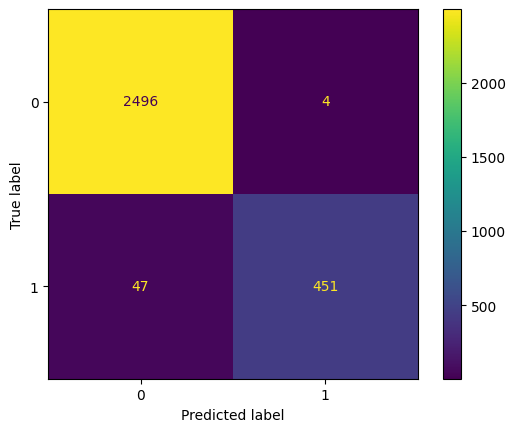

In [45]:
rf_cm = confusion_matrix(y_test, y_pred, labels=rf_opt.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, 
								 display_labels=rf_opt.classes_)
rf_disp.plot()
plt.show()

In [46]:
target_names = ['Predicted not leaving', 'Predicted leaving']
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

Predicted not leaving       0.98      1.00      0.99      2500
    Predicted leaving       0.99      0.91      0.95       498

             accuracy                           0.98      2998
            macro avg       0.99      0.95      0.97      2998
         weighted avg       0.98      0.98      0.98      2998



In [47]:
roc_auc_score(y_true=y_test, y_score=rf_opt.predict_proba(X_test)[:, 1])

0.9817987951807229

In [48]:
temp = pd.DataFrame({'model': ['Random Forest'],
					   'accuracy': [accuracy_score(y_test, y_pred)],
					   'precision': [precision_score(y_test, y_pred)],
					   'recall': [recall_score(y_test, y_pred)],
					   'f1': [f1_score(y_test, y_pred)],
					   'roc_auc': [roc_auc_score(y_true=y_test, y_score=rf_opt.predict_proba(X_test)[:, 1])]})

result = pd.concat([result, temp], axis=0).sort_values(by='roc_auc', ascending=False).reset_index(drop=True)
result

model  accuracy  precision    recall        f1   roc_auc
0        Random Forest  0.982989   0.991209  0.905622  0.946485  0.981799
1  Logistic Regression  0.825215   0.462555  0.222930  0.300860  0.892715

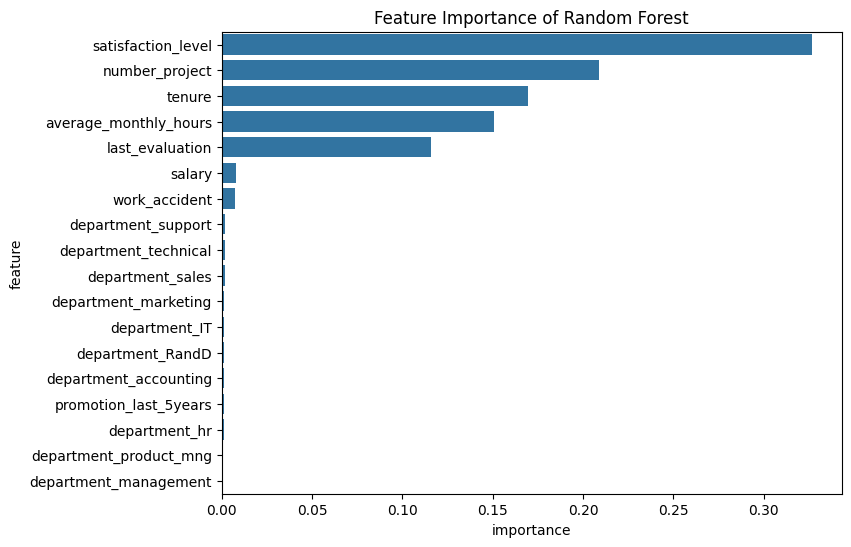

In [49]:
# feature importance of random forest
temp = pd.DataFrame({'feature': X_train.columns, 
					 'importance': rf_opt.feature_importances_})
temp.sort_values(by='importance', ascending=False, inplace=True)
temp.reset_index(drop=True, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=temp['importance'], y=temp['feature'])
plt.title('Feature Importance of Random Forest')

plt.show()

Based on the feature importance, the most important features are `satisfaction_level`, `number_project`, `tenure`, `average_monthly_hours`, and `last_evaluation`.

### XGBoost Classsifier

In [50]:
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

In [51]:
xgb = XGBClassifier(random_state = 0)
xgb_cv = GridSearchCV(xgb, cv_params, cv=5, refit='f1', n_jobs=-1, verbose=1)

In [52]:
%%time
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


CPU times: total: 781 ms
Wall time: 1.95 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', verbose=1)

In [53]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 15,
 'subsample': 0.7}

In [54]:
xgb_opt = XGBClassifier(n_estimators = 15, max_depth = 6,
                        learning_rate=0.1, min_child_weight=3,
						colsample_bytree=0.7,
                        subsample=0.7, random_state = 0)
xgb_opt.fit(X_train, y_train)
y_pred = xgb_opt.predict(X_test)

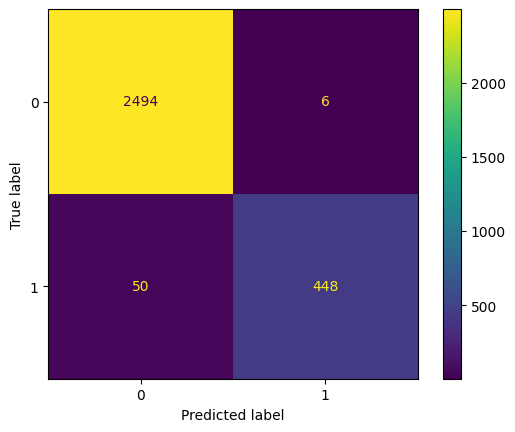

In [55]:
xgb_cm = confusion_matrix(y_test, y_pred, labels=xgb_opt.classes_)
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, 
								 display_labels=xgb_opt.classes_)

xgb_disp.plot()
plt.show()

In [56]:
target_names = ['Predicted not leaving', 'Predicted leaving']
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

Predicted not leaving       0.98      1.00      0.99      2500
    Predicted leaving       0.99      0.90      0.94       498

             accuracy                           0.98      2998
            macro avg       0.98      0.95      0.97      2998
         weighted avg       0.98      0.98      0.98      2998



In [57]:
roc_auc_score(y_true=y_test, y_score=xgb_opt.predict_proba(X_test)[:, 1])

0.9802730923694778

In [58]:
temp = pd.DataFrame({'model': ['XGBoost'],
					   'accuracy': [accuracy_score(y_test, y_pred)],
					   'precision': [precision_score(y_test, y_pred)],
					   'recall': [recall_score(y_test, y_pred)],
					   'f1': [f1_score(y_test, y_pred)],
					   'roc_auc': [roc_auc_score(y_true=y_test, y_score=xgb_opt.predict_proba(X_test)[:, 1])]})

result = pd.concat([result, temp], axis=0).sort_values(by='roc_auc', ascending=False).reset_index(drop=True)
result

model  accuracy  precision    recall        f1   roc_auc
0        Random Forest  0.982989   0.991209  0.905622  0.946485  0.981799
1              XGBoost  0.981321   0.986784  0.899598  0.941176  0.980273
2  Logistic Regression  0.825215   0.462555  0.222930  0.300860  0.892715

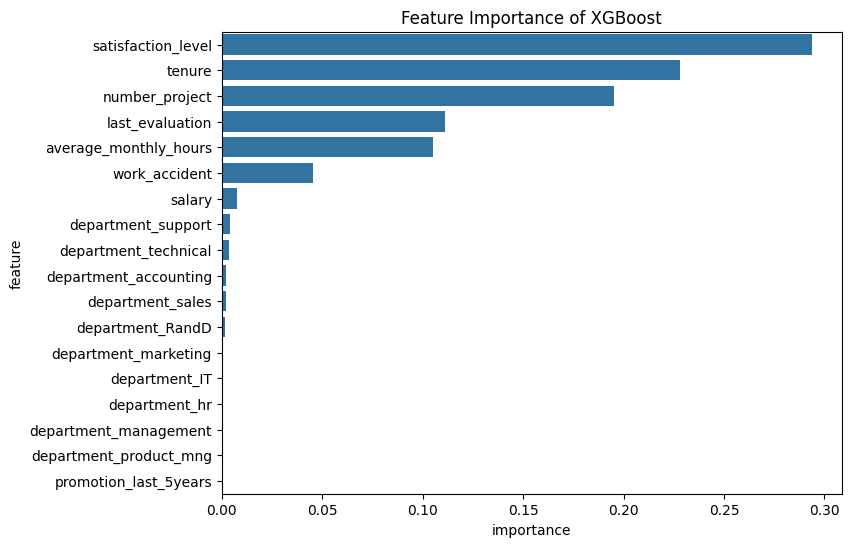

In [59]:
# feature importance of xgboost
temp = pd.DataFrame({'feature': X_train.columns, 
					 'importance': xgb_opt.feature_importances_})
temp.sort_values(by='importance', ascending=False, inplace=True)
temp.reset_index(drop=True, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=temp['importance'], y=temp['feature'])
plt.title('Feature Importance of XGBoost')

plt.show()

Based on the feature importance, the most important features are `satisfaction_level`, `number_project`, `tenure`, `average_monthly_hours`, and `last_evaluation`.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [60]:
result

model  accuracy  precision    recall        f1   roc_auc
0        Random Forest  0.982989   0.991209  0.905622  0.946485  0.981799
1              XGBoost  0.981321   0.986784  0.899598  0.941176  0.980273
2  Logistic Regression  0.825215   0.462555  0.222930  0.300860  0.892715

### Summary of model results

**Logistic Regression**


The logistic regression model achieved precision of 80%, recall of 83%, d1-score of 80% (all weighted average), accuracy of 83%, and auc score of 89%.

**Tree-based models**


The random forest model achieved precision of 99%, recall of 90%, f1-score of 94%, accuracy of 98%, and auc score of 98%. Which is close to the result of the XGBoost model. The XGBoost model achieved precision of 98%, recall of 89%, f1-score of 94%, accuracy of 98%, and auc score of 98%.

**Feature Importance**


All of the models agree that the most important features are at least `satisfaction_level`, `number_project`, `tenure`, `average_monthly_hours`, and `last_evaluation`. Which is closely related to the insights from the EDA.

### Conclusion and Recommendations

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To reduce the number of employees leaving the company, the company should consider the following:
- Cap the number of projects an employee can work on at a time.
- Reward employees for working longer hours and for working on more projects, or don't require them to do so.
- High evaluation score shouldn't just be based on the number of projects and hours worked, but also on the quality of the work.